In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Overview
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

## Challenge
“what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Import and Get Data

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Explore Data Analysis

**🔍 Find null using Seaborn to look where data is missing easily**

<AxesSubplot:>

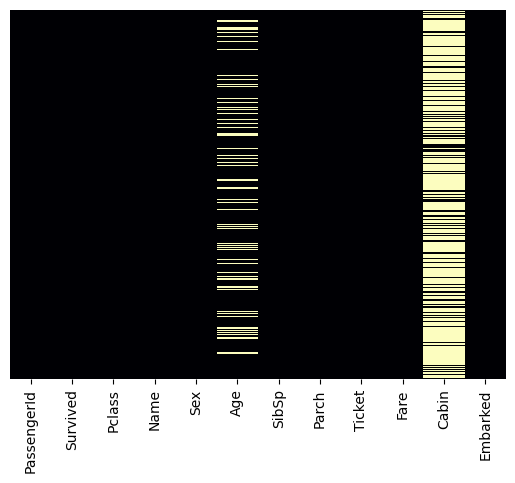

In [5]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [6]:
sns.set_style("whitegrid")

👫 See how many people are survived?<br>
Classified by gender, women are survived more than men.

<AxesSubplot:xlabel='Survived', ylabel='count'>

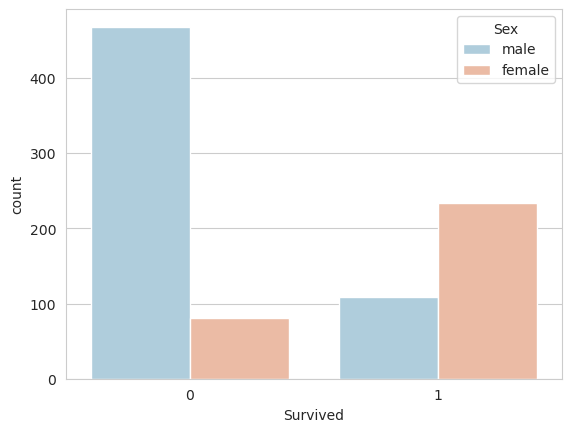

In [7]:
sns.countplot(x='Survived', hue='Sex', data=train_data, palette='RdBu_r')

👫 See how many people are survived?<br>
Classified by Pclass, found that high class are survived more than low class.

<AxesSubplot:xlabel='Survived', ylabel='count'>

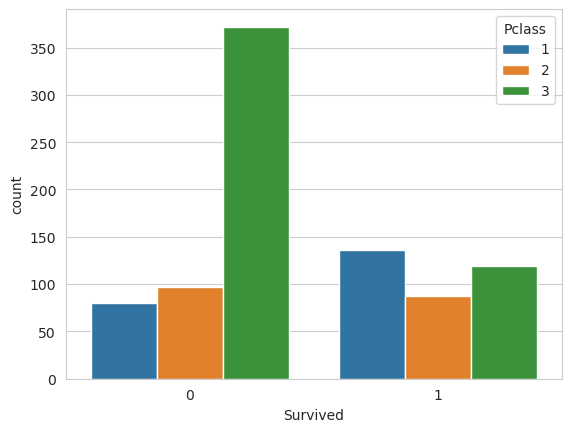

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)

👨‍👩‍👧‍👦 Using histplot to find average age of passenger

<AxesSubplot:xlabel='Age', ylabel='Count'>

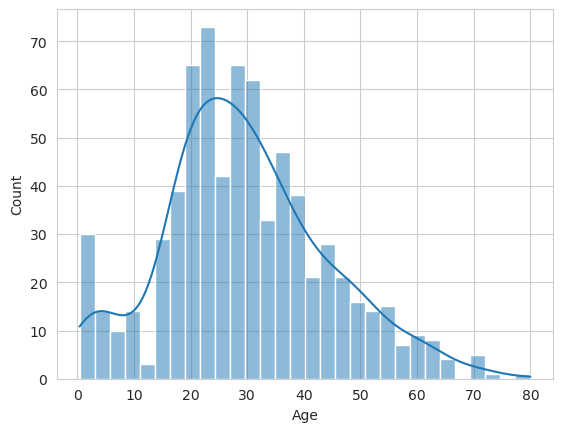

In [9]:
sns.histplot(train_data['Age'].dropna(),kde=True,bins=30)

🔍 See the detail of all data

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


👨‍👩‍👧‍👧 Look for passenger coming with sibling, spouse, etc.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

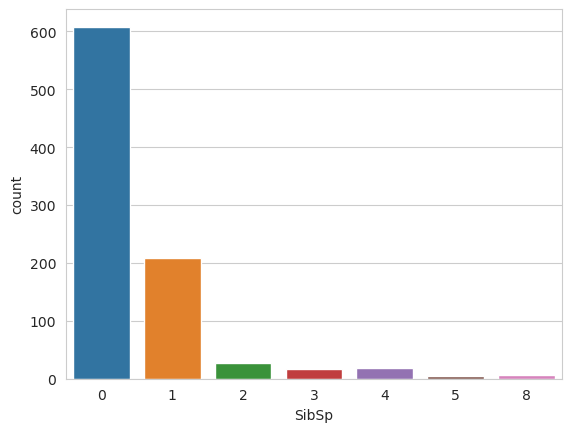

In [11]:
sns.countplot(x='SibSp', data=train_data)

<AxesSubplot:>

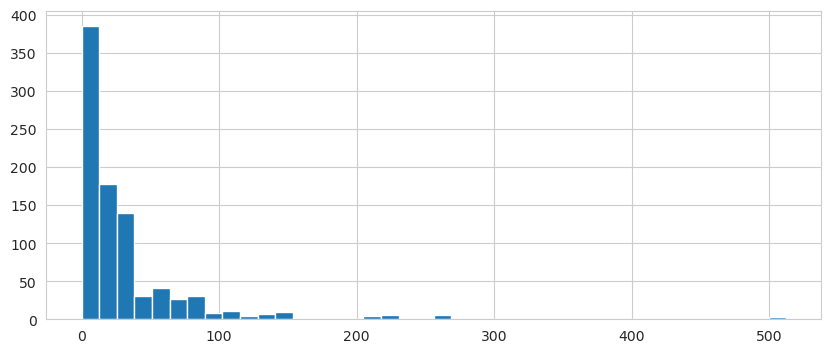

In [12]:
train_data['Fare'].hist(bins=40, figsize=(10,4))

➗ Find average age for missing data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

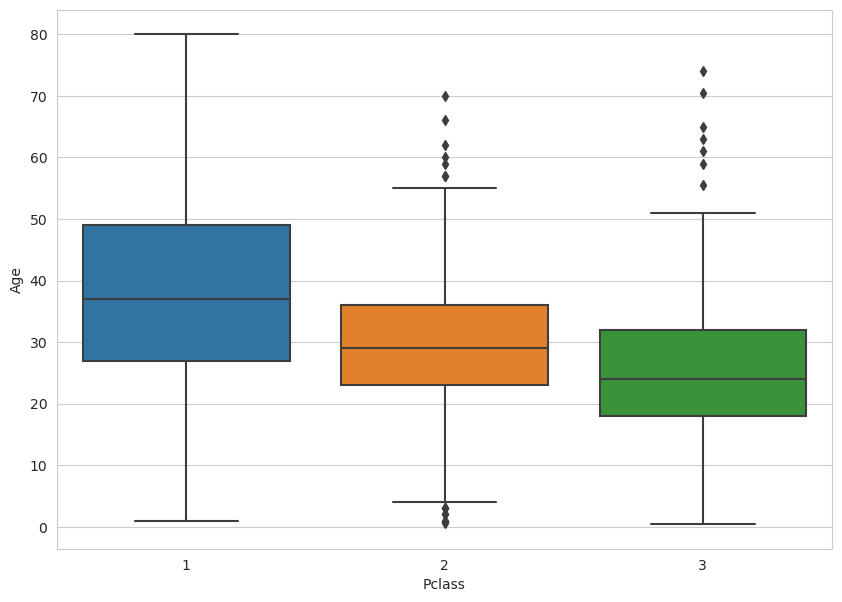

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train_data)

⨐ Function for filling average age classified by Pclass

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age,axis=1)

📊 Age average already filled, to prepare data.

<AxesSubplot:>

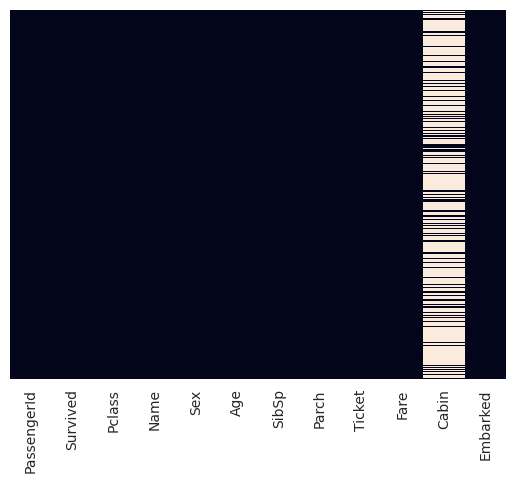

In [16]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

🚚 Remove Cabin because of there are many null value and not for calculation

In [17]:
train_data.drop('Cabin', axis=1, inplace=True)

Looking the data again.

<AxesSubplot:>

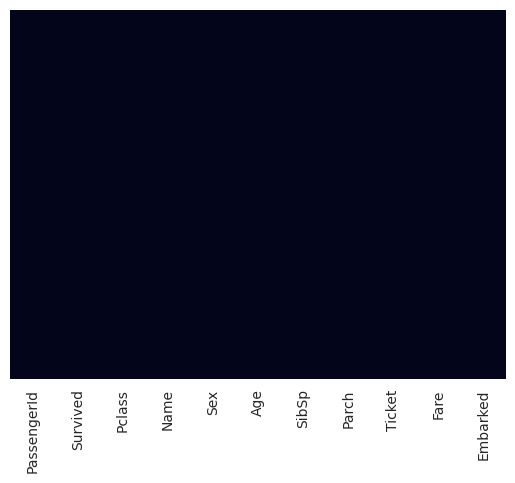

In [18]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [19]:
# If there are still some a little na value, we can drop using
# train_data.dropna(inplace=True)

**⚧️ Change all string to numeric for machine learning calculation**

In [20]:
train_data.head() # Sex -> male, female not for calculation

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Gender dummies

In [21]:
pd.get_dummies(train_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


🎬 Finalize 'Sex' column

In [22]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)

🎚️ Handle 'Embarked' column

In [23]:
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

Manipulate dataframe to prepare final data.

In [24]:
train_data = pd.concat([train_data,sex,embark],axis=1)

🔦 Display dataframe again.

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


🗑️ Drop column, prepare data for algorithm to calculate.

In [26]:
train_data.drop(['Sex','Embarked', 'Name', 'Ticket'],axis=1,inplace=True)

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


⚒️ Check data and finalize it (PassengerID).

In [28]:
train_data.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [29]:
train_data.drop('PassengerId',axis=1,inplace=True)

In [30]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Training and Testing Data
Split the data into training and testing sets.

In [31]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Train the Model
Train our model on our training data.

In [34]:
from sklearn.linear_model import LogisticRegression

⚙️ Add Solver and max_iter=1000 to solve limit problem.

In [35]:
logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)

In [36]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Predicting Test Data
🎉 Let's evaluate its performance by predicting off the test values!

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

## Print test data report

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



💎 Calculate a very specific value, using Confusion Matrix.

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test,predictions)

array([[137,  20],
       [ 30,  81]])